### import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [5]:
data = pd.read_csv("ipl_matches_2008_2022 (1).csv")

### view the data

In [8]:
data.head(-5)

,id,city,match_date,season,match_number,team1,team2,venue,toss_winner,toss_decision,superover,winning_team,won_by,margin,method,player_of_match,umpire1,umpire2
0,1312200,Ahmedabad,29-05-2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,27-05-2022,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,CB Gaffaney,Nitin Menon
2,1312198,Kolkata,25-05-2022,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,J Madanagopal,MA Gough
3,1312197,Kolkata,24-05-2022,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,BNJ Oxenford,VK Sharma
4,1304116,Mumbai,22-05-2022,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,335991,Chandigarh,25-04-2008,2007/08,10,Kings XI Punjab,Mumbai Indians,"Punjab Cricket Association Stadium, Mohali",Mumbai Indians,field,N,Kings XI Punjab,Runs,66.0,NaN,KC Sangakkara,Aleem Dar,AM Saheba
941,335990,Hyderabad,24-04-2008,2007/08,9,Deccan Chargers,Rajasthan Royals,"Rajiv Gandhi International Stadium, Uppal",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,3.0,NaN,YK Pathan,Asad Rauf,MR Benson
942,335989,Chennai,23-04-2008,2007/08,8,Chennai Super Kings,Mumbai Indians,"MA Chidambaram Stadium, Chepauk",Mumbai Indians,field,N,Chennai Super Kings,Runs,6.0,NaN,ML Hayden,DJ Harper,GA Pratapkumar
943,335988,Hyderabad,22-04-2008,2007/08,7,Deccan Chargers,Delhi Daredevils,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,bat,N,Delhi Daredevils,Wickets,9.0,NaN,V Sehwag,IL Howell,AM Saheba


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               950 non-null    int64  
 1   city             899 non-null    object 
 2   match_date       950 non-null    object 
 3   season           950 non-null    object 
 4   match_number     950 non-null    object 
 5   team1            950 non-null    object 
 6   team2            950 non-null    object 
 7   venue            950 non-null    object 
 8   toss_winner      950 non-null    object 
 9   toss_decision    950 non-null    object 
 10  superover        946 non-null    object 
 11  winning_team     946 non-null    object 
 12  won_by           950 non-null    object 
 13  margin           932 non-null    float64
 14  method           19 non-null     object 
 15  player_of_match  946 non-null    object 
 16  umpire1          950 non-null    object 
 17  umpire2         

### clean the data
### drop the "method" feature

In [14]:
data.drop(["method"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               950 non-null    int64  
 1   city             899 non-null    object 
 2   match_date       950 non-null    object 
 3   season           950 non-null    object 
 4   match_number     950 non-null    object 
 5   team1            950 non-null    object 
 6   team2            950 non-null    object 
 7   venue            950 non-null    object 
 8   toss_winner      950 non-null    object 
 9   toss_decision    950 non-null    object 
 10  superover        946 non-null    object 
 11  winning_team     946 non-null    object 
 12  won_by           950 non-null    object 
 13  margin           932 non-null    float64
 14  player_of_match  946 non-null    object 
 15  umpire1          950 non-null    object 
 16  umpire2          950 non-null    object 
dtypes: float64(1), i

### total number of matches,teams and seasons

In [24]:
# Number of matches and seasons
total_matches = data.shape[0]
total_seasons = data['season'].nunique()
unique_teams = pd.unique(data[['team1', 'team2']].values.ravel('K'))
teams = len(unique_teams)
print(f"Total Matches: {total_matches}")
print(f"Total Seasons: {total_seasons}")
print(f"Teams: {teams}")

Total Matches: 950
Total Seasons: 15
Teams: 18


### matches played per season

In [27]:
matches_per_season = data['season'].value_counts()
print(matches_per_season)

season
2013       76
2022       74
2012       74
2011       73
2021       60
2020/21    60
2019       60
2018       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: count, dtype: int64


# visualising the data
## most wins in IPL

In [17]:
# count the number of wins per each team
wins_per_team = data['winning_team'].value_counts()
print(wins_per_team)

winning_team
Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Gujarat Lions                   13
Punjab Kings                    13
Pune Warriors                   12
Gujarat Titans                  12
Rising Pune Supergiant          10
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


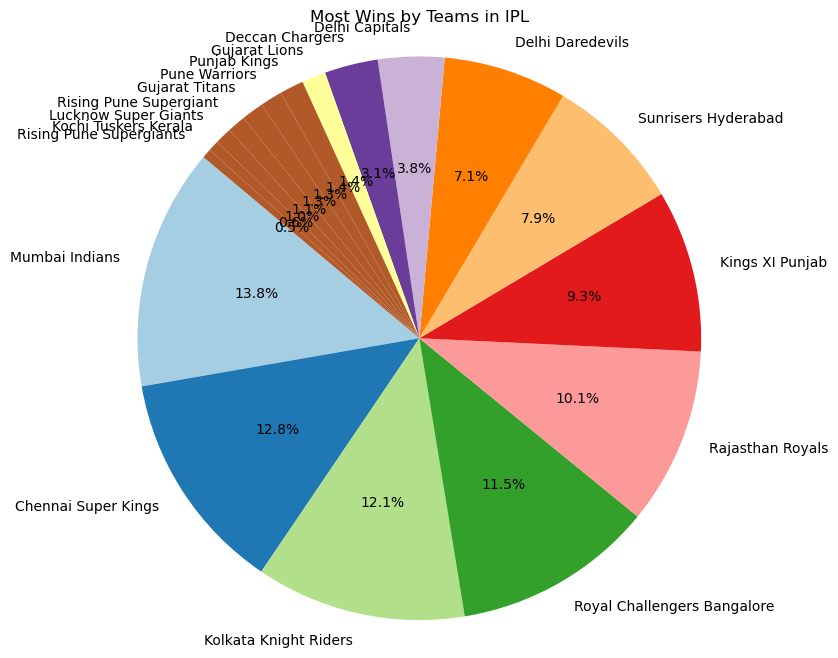

In [19]:
# plotting the pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired(range(len(wins_per_team))) 
plt.pie(wins_per_team, labels=wins_per_team.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Most Wins by Teams in IPL")
plt.axis('equal') 
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10612\3003993862.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wins_per_team.index, y=wins_per_team.values, palette="viridis")


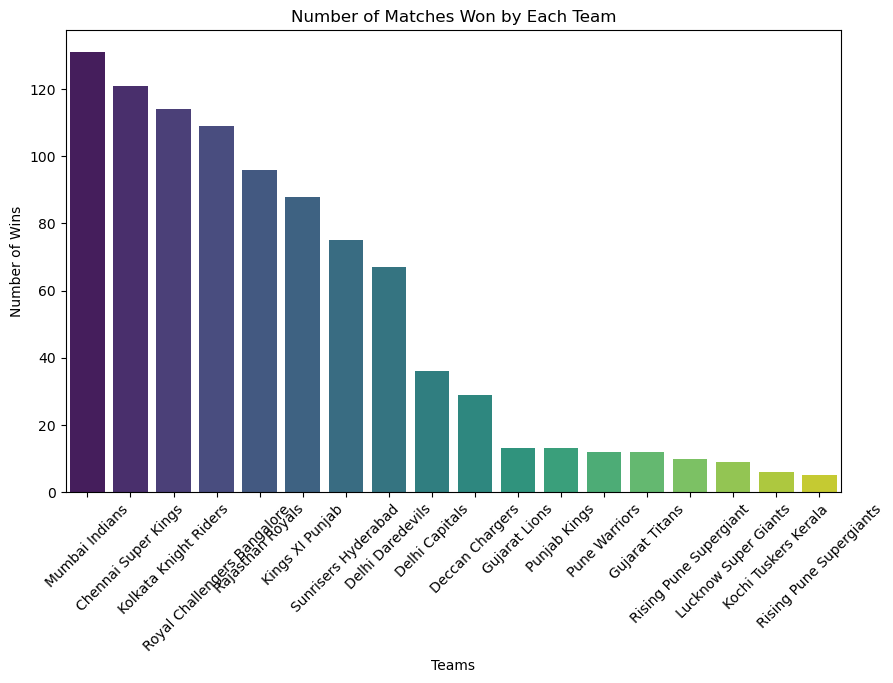

In [21]:
# Bar plot for number of matches won by each team
wins_per_team = data['winning_team'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=wins_per_team.index, y=wins_per_team.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Number of Matches Won by Each Team")
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.show()

### toss wins vs match wins

In [30]:
# toss wins leading to match wins
data['toss_match_win'] = data['toss_winner'] == data['winning_team']
toss_impact = data['toss_match_win'].value_counts(normalize=True) * 100

print(f"Toss Impact on Match Wins:\n{toss_impact}")

Toss Impact on Match Wins:
toss_match_win
True     51.473684
False    48.526316
Name: proportion, dtype: float64


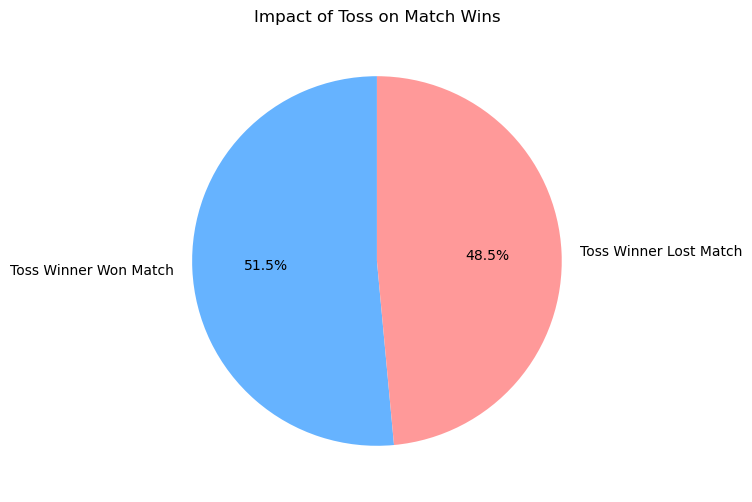

In [32]:
# Pie chart for toss impact
plt.figure(figsize=(6, 6))
plt.pie(toss_impact, labels=['Toss Winner Won Match', 'Toss Winner Lost Match'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Impact of Toss on Match Wins")
plt.show()

### most player of the match awards


player_of_match
AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
YK Pathan         16
SR Watson         16
KA Pollard        14
SK Raina          14
V Kohli           14
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_10612\3652805698.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_players.index, x=top_players.values, palette="mako", hue=None)


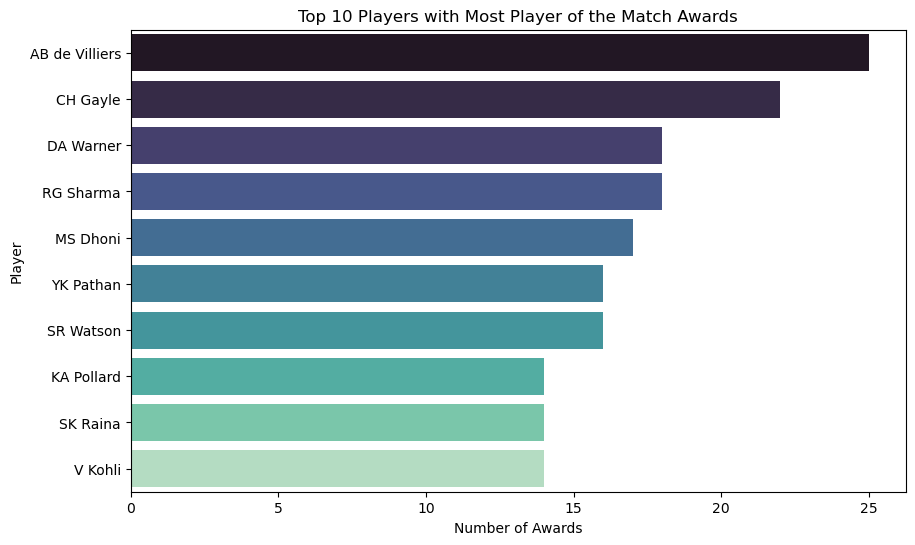

In [35]:
# Top 10 players with most Player of the Match awards
top_players = data['player_of_match'].value_counts().head(10)
print(top_players)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_players.index, x=top_players.values, palette="mako", hue=None)
plt.title("Top 10 Players with Most Player of the Match Awards")
plt.xlabel("Number of Awards")
plt.ylabel("Player")
plt.show()

### venue analysis

venue
Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Feroz Shah Kotla                                        60
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     46
Punjab Cricket Association Stadium, Mohali              35
Wankhede Stadium, Mumbai                                31
Sheikh Zayed Stadium                                    29
Sharjah Cricket Stadium                                 28
Maharashtra Cricket Association Stadium                 22
Dr DY Patil Sports Academy, Mumbai                      20
Dr DY Patil Sports Academy                              17
Brabourne Stadium, Mumbai                               17
Subrata Roy Sahara Stadium                        

C:\Users\hp\AppData\Local\Temp\ipykernel_10612\2488440389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=venue_counts.index, x=venue_counts.values, palette="Blues_r",hue= None)


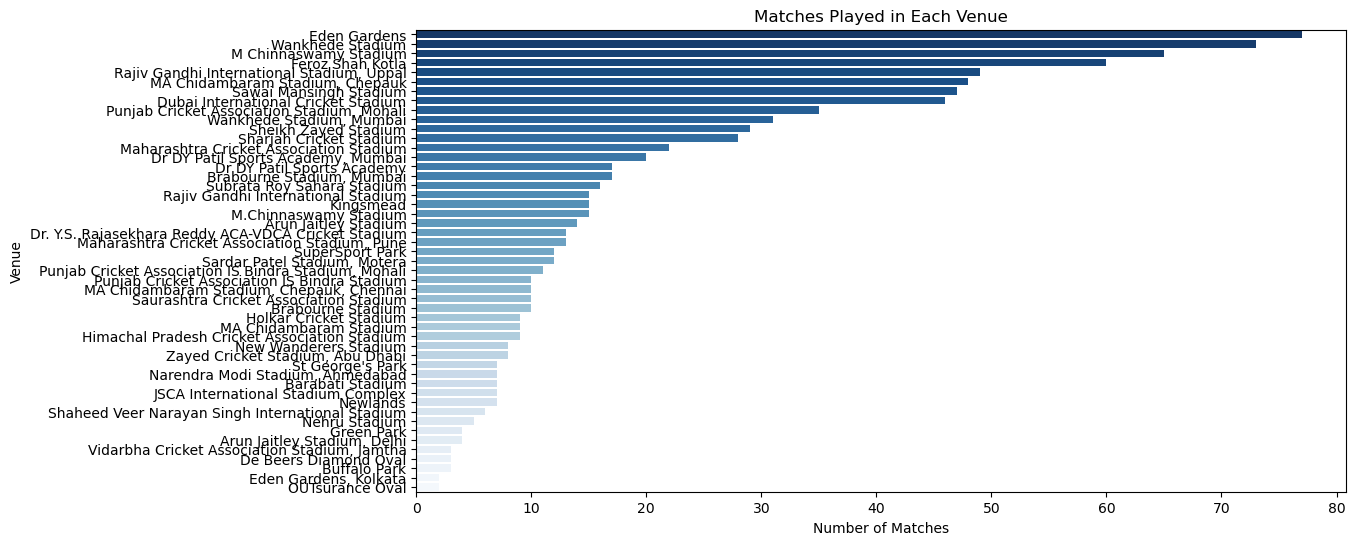

In [38]:
# Matches played in each venue
venue_counts = data['venue'].value_counts()
print(venue_counts)
plt.figure(figsize=(12, 6))
sns.barplot(y=venue_counts.index, x=venue_counts.values, palette="Blues_r",hue= None)
plt.title("Matches Played in Each Venue")
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.show()

### venue with most wins per team

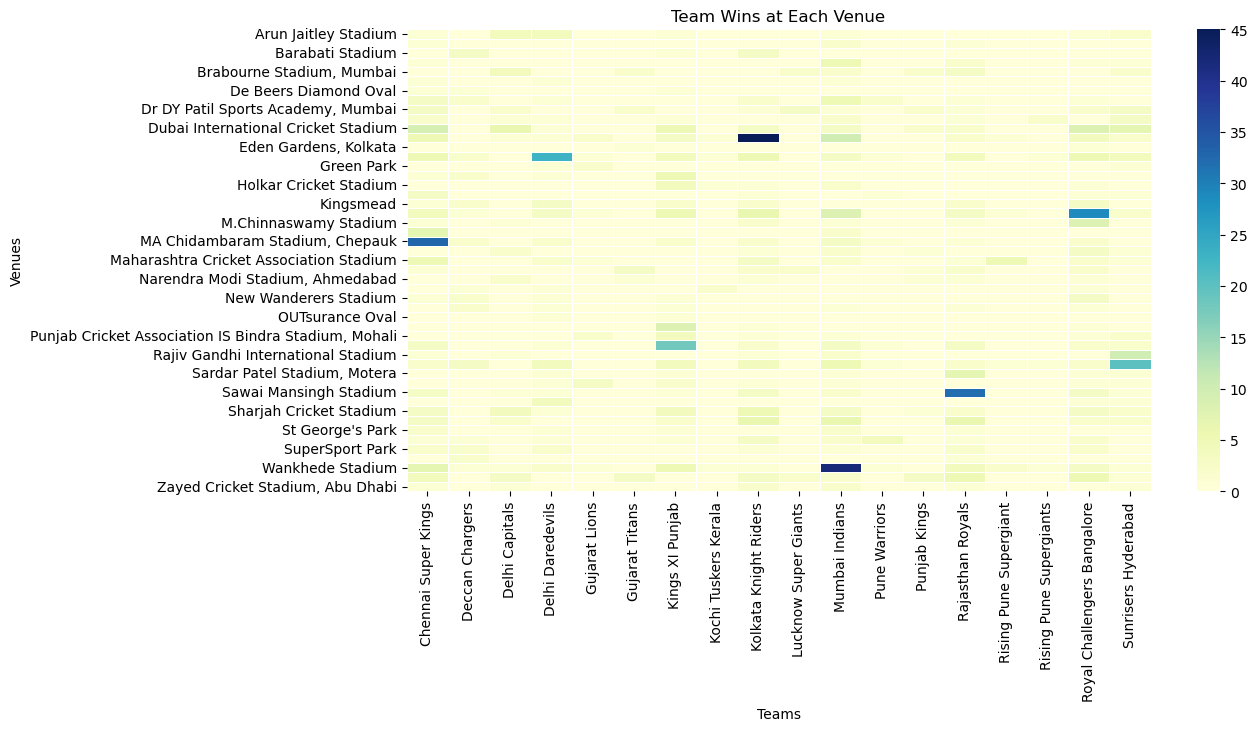

In [41]:
# Venue with most wins per team
venue_wins = data.groupby('venue')['winning_team'].value_counts().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(venue_wins, cmap="YlGnBu", annot=False, linewidths=0.5)
plt.title("Team Wins at Each Venue")
plt.xlabel("Teams")
plt.ylabel("Venues")
plt.show()

### winning trends

winning_team  Chennai Super Kings  Kolkata Knight Riders  Mumbai Indians  \
season                                                                     
2007/08                       9.0                    6.0             7.0   
2009                          8.0                    3.0             5.0   
2009/10                       9.0                    7.0            11.0   
2011                         11.0                    8.0            10.0   
2012                         10.0                   12.0            10.0   
2013                         12.0                    6.0            13.0   
2014                         10.0                   11.0             7.0   
2015                         10.0                    7.0            10.0   
2016                          NaN                    8.0             7.0   
2017                          NaN                    9.0            12.0   
2018                         11.0                    9.0             6.0   
2019        

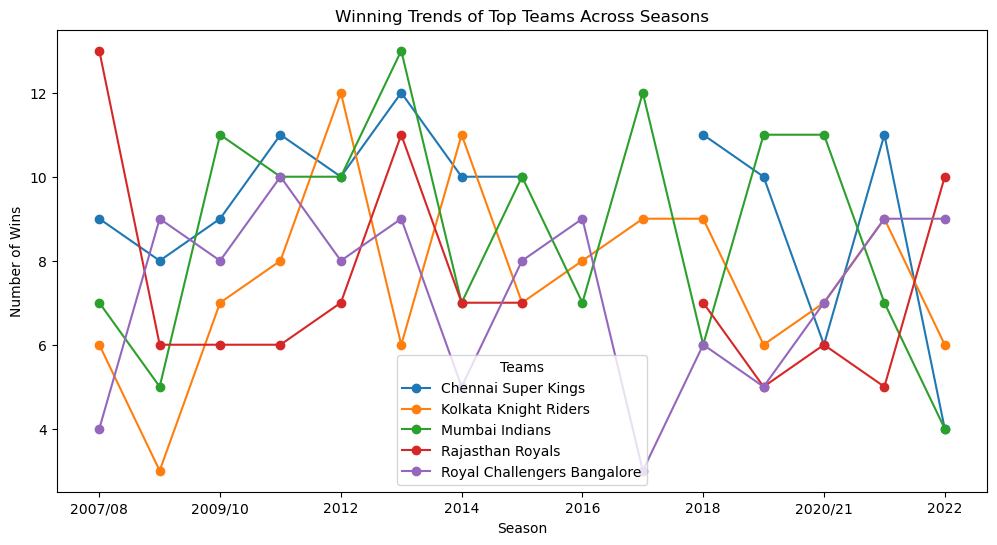

In [44]:
# Wins per season for top 5 teams
top_teams = wins_per_team.index[:5]
team_season_wins = data[data['winning_team'].isin(top_teams)].groupby(['season', 'winning_team']).size().unstack()
print(team_season_wins)
# Line plot of trends
team_season_wins.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Winning Trends of Top Teams Across Seasons")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.legend(title="Teams")
plt.show()
